In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
data = pd.read_csv("data.csv")
print(data)

    0.78051  -0.063669  1
0   0.28774    0.29139  1
1   0.40714    0.17878  1
2   0.29230    0.42170  1
3   0.50922    0.35256  1
4   0.27785    0.10802  1
..      ...        ... ..
94  0.77029    0.70140  0
95  0.73156    0.71782  0
96  0.44556    0.57991  0
97  0.85275    0.85987  0
98  0.51912    0.62359  0

[99 rows x 3 columns]


In [164]:
data.columns = ["x1", "x2", "label"]
x = data[['x1','x2']].values
y = data['label'].values

In [165]:
def classification(w, x, b):
    z = w[0]*x[0] + w[1]*x[1] + b
    return 1 if z >= 0 else 0

In [166]:
def run_perceptron(w, x, y, r, b):
    for i in range(len(x)):
        prediction = classification(w, x[i], b)
        #check for miscalculation
        if prediction != y[i]:
            if prediction == 0:
                b += r
                w += r*x[i]
            else:
                b -= r
                w -= (r*x[i])
    return w, b 

In [167]:
def plot_for(iteration, learning_rate):
    #plot 
    w = np.random.randn(2)
    while abs(w[1]) < 0.1:
        w = np.random.randn(2)
    b = np.random.randn()
    
    plt.scatter(data['x1'], data['x2'], c=data['label'])
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    xs = np.linspace(0,1,100)
    ys = -(w[0] / w[1]) * xs - (b / w[1])
    plt.plot(xs, ys, 'r-')
    
    for _ in range(iteration):
        w, b = run_perceptron(w, x, y, learning_rate, b)
        ys = -(w[0]/w[1])*xs - (b/w[1])
        plt.plot(xs, ys, 'g--')
    #final black line
    ys = -(w[0]/w[1])*xs - (b/w[1])
    plt.plot(xs, ys, 'k-', linewidth=2)
    
    plt.show()

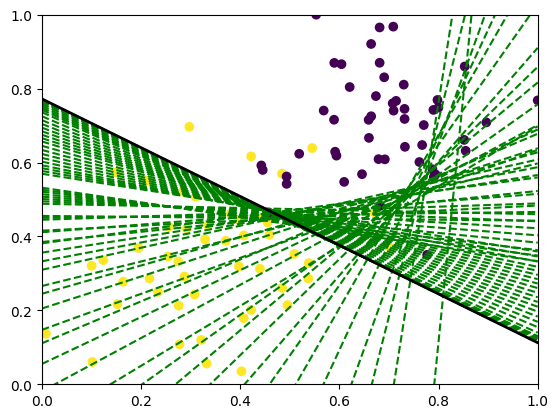

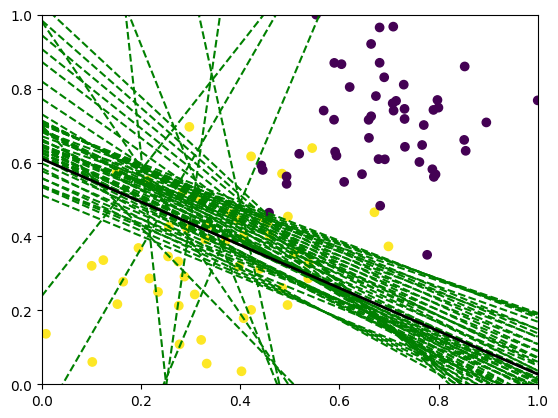

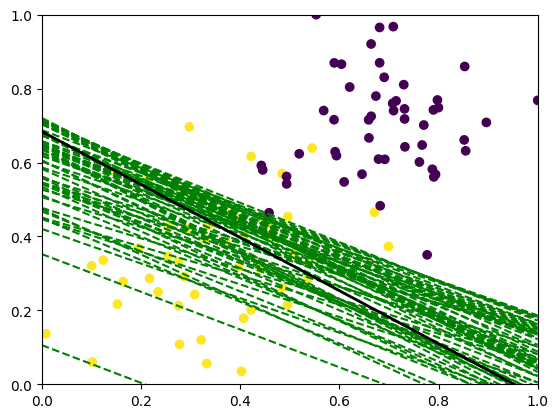

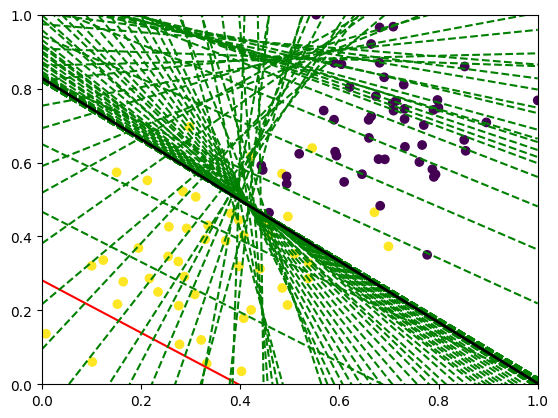

In [168]:
plot_for(65, 0.01)
plot_for(65, 0.1)
plot_for(65, 1)
plot_for(400, 0.005)